In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
sns.set_style("white")
sns.set_palette(sns.color_palette("Set2"))

In [3]:
def make_dataset(nstorms,mslp,u850,v850,shear,lat,lon):
	"""
	This function creates the training dataset or similar for TC variables
	Variables used are:
			mslp
			u850
			v850
			shear
			lat
			lon
	"""
	
	processed_variables = np.zeros((nstorms,6))
	processed_variables[:,0] = mslp # or p?
	processed_variables[:,1] = u850
	processed_variables[:,2] = v850
	processed_variables[:,3] = shear
	processed_variables[:,4] = lat
	processed_variables[:,5] = lon

	return processed_variables

In [3]:
# filepath = '/user/home/al18709/work/ibtracks/miroc6_hist_tracks.csv'
filepath = '/user/home/al18709/work/ibtracks/miroc6_ssp585_tracks.csv'
tracks = pd.read_csv(filepath)
print(tracks)

                            sid  year  month  day  hour     lat      lon  \
0            miroc6-hist-1-2015  2015      3   28    18  -6.895  353.392   
1            miroc6-hist-1-2015  2015      3   28    20  -6.886  353.225   
2            miroc6-hist-1-2015  2015      3   28    22  -6.878  353.069   
3            miroc6-hist-1-2015  2015      3   29     0  -6.871  352.925   
4            miroc6-hist-1-2015  2015      3   29     2  -6.866  352.794   
...                         ...   ...    ...  ...   ...     ...      ...   
2358907  miroc6-hist-17200-2100  2100      7   10     8  21.301  137.745   
2358908  miroc6-hist-17200-2100  2100      7   10    10  21.242  137.636   
2358909  miroc6-hist-17200-2100  2100      7   10    12  21.204  137.502   
2358910  miroc6-hist-17200-2100  2100      7   10    14  21.185  137.340   
2358911  miroc6-hist-17200-2100  2100      7   10    16  21.187  137.142   

             v  shear     rh  u850  v850        p  
0        10.35   5.95  55.65 -3.81 

In [4]:
# organise Kerry's tracks
print(tracks.shape)
p = tracks.p*100
u850 = tracks.u850
v850 = tracks.v850
shear = tracks.shear
lats = tracks.lat
lons = tracks.lon

# correct longitudes
for i in range(len(lons)):
	if lons[i] > 180:
		lons[i] = lons[i]-360

sids = tracks.sid
sids_unique=sids.drop_duplicates
tracks_grouped = tracks.groupby('sid')
nstorms,_ = tracks.shape
ke_data = make_dataset(nstorms,p,u850,v850,shear,lats,lons)
# np.save('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-hist.npy',ke_data)
np.save('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-ssp585.npy',ke_data)

# print(tracks_grouped.get_group('miroc6-hist-19351-1979'))

(2358912, 13)


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
data = 'extreme_test'
y = np.load(f'/user/work/al18709/tc_data_flipped/{data}_combined_y_all.npy')
X = np.load(f'/user/work/al18709/tc_data_flipped/{data}_combined_X_all.npy')
meta=pd.read_csv(f'/user/work/al18709/tc_data_flipped/{data}_meta_all.csv')

In [4]:
datas = ['train','test','extreme_test','extreme_valid','valid']
for data in datas:
    globals()[f'{data}_y'] = np.load(f'/user/work/al18709/tc_data_flipped/{data}_combined_y_final.npy')
    globals()[f'{data}_X'] = np.load(f'/user/work/al18709/tc_data_flipped/{data}_combined_X_final.npy')
    globals()[f'{data}_t'] = np.load(f'/user/work/al18709/tc_data_flipped_t/{data}_y_.npy')
    globals()[f'{data}_meta'] = pd.read_csv(f'/user/work/al18709/tc_data_flipped/{data}_meta_final.csv')
    print(globals()[f'{data}_t'].shape)

(18928, 100, 100)
(6264, 100, 100)
(6222, 100, 100)
(5709, 100, 100)
(6013, 100, 100)


In [6]:
test = np.load('/user/home/al18709/work/tc_data_flipped_var/u-200_train_X.npy')
# test = np.load('X_2004286N14263.npy')

In [7]:
test

array([[[ -7.46496964,  -6.61846542,  -4.26329041, ...,  -5.51000595,
         -10.63268661, -10.63268661],
        [-11.52527618,  -8.77717209,  -8.22415543, ...,  -6.79552841,
          -8.82325745,  -8.13683701],
        [-12.0055275 , -10.62541199,  -9.77163315, ...,  -3.93342209,
          -5.56093979,  -5.32809067],
        ...,
        [ -6.86101532,  -8.54674911,  -4.1444397 , ...,  -2.33258438,
          -4.57860947,  -4.66835022],
        [ -3.94554901,  -5.67736435,  -5.23592377, ...,  -2.08760452,
          -5.73072815,  -6.89254761],
        [  0.11718559,  -2.6576004 ,  -7.22241592, ...,  -4.98609543,
          -5.98540497,  -5.75983429]],

       [[  3.32128716,   5.05795479,   3.68026352, ...,   4.23570633,
           4.14596176,   3.36009598],
        [  3.07146072,   0.3597374 ,  -2.26709366, ...,   0.56833076,
          -2.45628357,  -6.52629471],
        [ -8.21687698, -11.75085068, -11.05715179, ...,  -2.69641113,
          -2.69155884,  -0.97914505],
        ...,


In [5]:
combined_arr_X = np.concatenate((train_X,test_X,extreme_test_X,extreme_valid_X,valid_X), axis=0)
t = np.concatenate((train_t,test_t,extreme_test_t,extreme_valid_t,valid_t), axis=0)
y = np.concatenate((train_y,test_y,extreme_test_y,extreme_valid_y,valid_y), axis=0)
combined_df = pd.concat([train_meta,test_meta,extreme_test_meta,extreme_valid_meta,valid_meta], axis=0, ignore_index=True)

In [6]:
combined_df.to_csv('/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_meta2.csv')

In [8]:
print(t.shape)
print(y.shape)
print(combined_arr_X.shape)

(43136, 100, 100)
(87818, 100, 100)
(43136, 10, 10, 9)


In [9]:
print(combined_df.sid.drop_duplicates())
print(t.shape)
np.save(f'/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_t.npy',t)

0        1999343S09095
49       1999357S08076
108      2000006S15164
128      2000024S12100
159      2000025S15056
             ...      
42980    2011167N08129
42993    2009299N12153
43050    2011244N37296
43062    2008246N12338
43091    2006224N21141
Name: sid, Length: 1254, dtype: object
(43136, 100, 100)


In [6]:
# print(meta)
print(X.shape)
print(np.count_nonzero(np.isnan(X)))

NameError: name 'X' is not defined

In [7]:
# create training dataset
variables = ['precip','mslp','q-925','u-200','u-850','v-200','v-850','t-600','rh-600']
X = combined_arr_X
meta = combined_df
nstorms,_,_,_ = X.shape
# precip = np.mean(X[:,:,:,0],axis=(1,2))
# mslp = np.mean(X[:,:,:,1],axis=(1,2))
# q925 = np.mean(X[:,:,:,2],axis=(1,2))
# u200 = np.mean(X[:,:,:,3],axis=(1,2))
# u850 = np.mean(X[:,:,:,4],axis=(1,2))
# v200 = np.mean(X[:,:,:,5],axis=(1,2))
# v850 = np.mean(X[:,:,:,6],axis=(1,2))
# shear = np.sqrt(np.abs(np.square(u850-u200) - np.square(v850-v200)))
# lat = meta.centre_lat
# lon = meta.centre_lon
# t600 = np.mean(X[:,:,:,7],axis=(1,2))
# rh600 = np.mean(X[:,:,:,8],axis=(1,2))

precip = np.mean(X[:,4:5,4:5,0],axis=(1,2))
mslp = np.mean(X[:,4:5,4:5,1],axis=(1,2))
q925 = np.mean(X[:,4:5,4:5,2],axis=(1,2))
u200 = np.mean(X[:,4:5,4:5,3],axis=(1,2))
u850 = np.mean(X[:,4:5,4:5,4],axis=(1,2))
v200 = np.mean(X[:,4:5,4:5,5],axis=(1,2))
v850 = np.mean(X[:,4:5,4:5,6],axis=(1,2))
shear = np.sqrt(np.abs(np.square(u850-u200) - np.square(v850-v200)))
lat = meta.centre_lat
lon = meta.centre_lon
t600 = np.mean(X[:,4:5,4:5,7],axis=(1,2))
rh600 = np.mean(X[:,4:5,4:5,8],axis=(1,2))



processed_variables = np.zeros((nstorms,8))
processed_variables[:,0] = mslp # or p?
# processed_variables[:,1] = q925 # or rh
processed_variables[:,1] = u850
processed_variables[:,2] = v850
processed_variables[:,3] = shear
processed_variables[:,4] = lat
processed_variables[:,5] = lon
# processed_variables[:,6] = t600
# processed_variables[:,7] = rh600

In [8]:
print(np.count_nonzero(np.isnan(processed_variables[:,0])))
print(np.count_nonzero(np.isnan(processed_variables[:,1])))
print(np.count_nonzero(np.isnan(processed_variables[:,2])))
print(np.count_nonzero(np.isnan(processed_variables[:,3])))
print(np.count_nonzero(np.isnan(processed_variables[:,4])))
print(np.count_nonzero(np.isnan(processed_variables[:,5])))
print(np.count_nonzero(np.isnan(processed_variables[:,6])))
print(np.count_nonzero(np.isnan(processed_variables[:,7])))
# print(processed_variables)

0
0
0
0
0
0
0
0


In [9]:
print(processed_variables[:,:6].shape)

(43136, 6)


In [10]:
# save training dataset
np.save(f'/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_X.npy',processed_variables[:,:6])
np.save(f'/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_y.npy',y)
np.save(f'/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_t.npy',t)
meta.to_csv(f'/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_meta.csv')

print(processed_variables.shape)
print(mslp)

# for sid in sids_unique:
# 	storm = tracks_grouped.get_group(sid)
# 	storm_lats = storm.lat
# 	storm_lons = storm.lon
# 	storm_month = storm.month
# 	storm_year = storm.year
# 	storm_v = storm.v

	

(43136, 8)
[275.15127563 279.06481934 274.59997559 ... 279.26361084 279.81970215
 278.11700439]


In [11]:
print(t.shape)

(87818, 100, 100)


In [23]:
print(np.load('/user/work/al18709/tc_data_flipped/KE_tracks/tcs_and_storms_X.npy').shape)

(43136, 6)


In [3]:
data = 'extreme_test'
y = np.load(f'/user/work/al18709/tc_data_flipped/{data}_combined_y.npy')
X = np.load(f'/user/work/al18709/tc_data_flipped/{data}_combined_X.npy')
meta=pd.read_csv(f'/user/work/al18709/tc_data_flipped/{data}_meta.csv')

# create training dataset
variables = ['precip','mslp','q-925','u-200','u-850','v-200','v-850']
nstorms,_,_,_ = X.shape
precip = np.mean(X[:,:,:,0],axis=(1,2))
mslp = np.mean(X[:,:,:,1],axis=(1,2))
q925 = np.mean(X[:,:,:,2],axis=(1,2))
u200 = np.mean(X[:,:,:,3],axis=(1,2))
u850 = np.mean(X[:,:,:,4],axis=(1,2))
v200 = np.mean(X[:,:,:,5],axis=(1,2))
v850 = np.mean(X[:,:,:,6],axis=(1,2))
shear = np.sqrt(np.abs(np.square(u850-u200) - np.square(v850-v200)))
lat = meta.centre_lat
lon = meta.centre_lon


processed_variables = np.zeros((nstorms,6))
processed_variables[:,0] = mslp # or p?
processed_variables[:,1] = u850
processed_variables[:,2] = v850
processed_variables[:,3] = shear
processed_variables[:,4] = lat
processed_variables[:,5] = lon

np.save(f'/user/work/al18709/tc_data_flipped/KE_tracks/{data}_X.npy',processed_variables)
np.save(f'/user/work/al18709/tc_data_flipped/KE_tracks/{data}_y.npy',y)
meta.to_csv(f'/user/work/al18709/tc_data_flipped/KE_tracks/{data}_meta.csv')

In [50]:
indir_var = '/user/home/al18709/work/tc_data_flipped_var/'
indir_mswep = '/user/home/al18709/work/tc_data_mswep_flipped/'
# indir_topography = ''
outdir = '/user/home/al18709/work/tc_data_flipped/'

mswep_X = np.load(indir_mswep+'mswep_' + 'extreme_valid'+'_X.npy')

In [7]:
print(mswep_X)

[[[ 0.375   0.75    0.75   ...  2.      1.6875  1.6875]
  [ 0.375   0.75    0.75   ...  2.0625  1.6875  1.6875]
  [ 0.375   0.75    0.75   ...  2.0625  1.6875  1.6875]
  ...
  [ 0.      0.      0.     ...  0.75    0.4375  0.4375]
  [ 0.      0.      0.     ...  0.1875  0.1875  0.1875]
  [ 0.      0.      0.     ...  0.1875  0.1875  0.1875]]

 [[ 3.125   3.125   3.5    ...  1.3125  1.3125  1.3125]
  [ 2.8125  2.8125  3.1875 ...  1.4375  1.4375  1.4375]
  [ 2.8125  2.8125  3.1875 ...  1.4375  1.4375  1.4375]
  ...
  [ 0.      0.      0.     ...  0.25    0.25    0.25  ]
  [ 0.      0.      0.     ...  0.25    0.25    0.25  ]
  [ 0.      0.      0.     ...  0.0625  0.0625  0.0625]]

 [[ 0.5625  0.25    0.25   ...  0.375   0.375   0.375 ]
  [ 0.5625  0.25    0.25   ...  0.375   0.375   0.375 ]
  [ 0.5625  0.25    0.25   ...  0.25    0.25    0.375 ]
  ...
  [ 0.      0.      0.     ...  0.3125  0.3125  0.625 ]
  [ 0.      0.      0.     ...  0.3125  0.3125  0.625 ]
  [ 0.      0.      0.    

In [17]:
print(X)
# print(meta)

[[[[ 0.375   0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   ...
   [ 2.      0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]]

  [[ 0.375   0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   ...
   [ 2.0625  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]]

  [[ 0.375   0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   [ 0.75    0.      0.     ...  0.      0.      0.    ]
   ...
   [ 2.0625  0.      0.     ...  0.      0.      0.    ]
   [ 1.6875  0.      0.     ...  0.      0.      0.    ]
   [ 1

In [23]:

# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# c = ax.contourf(lons,lats, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
# ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)
# import plotly.express as px

# fig = px.density_contour(tracks, x="lon", y="lat")
# fig.update_traces(contours_coloring="fill", contours_showlabels = True)
# fig.show()

In [4]:
top = np.load('/user/home/al18709/work/tc_data_flipped/extreme_valid_y.npy')
what = np.load('/user/home/al18709/work/tc_data_flipped/extreme_valid_X.npy')

In [7]:
print(what.shape)

(5425, 10, 10)


In [41]:
a = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_test_X.npy')
b = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/extreme_test_y.npy')

In [42]:
print(a.shape)
print(b.shape)

(5217, 6)
(5217, 100, 100)


In [39]:
# top = np.load('/user/home/al18709/work/tc_data_flipped_t/valid_y.npy')
# what = np.load('/user/home/al18709/work/tc_data_flipped_t/valid_X.npy')

In [44]:
print(top.shape)
print(what.shape)

(5217, 100, 100)
(5217, 10, 10)


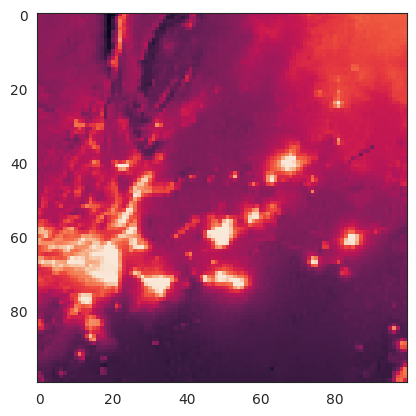

In [37]:
plt.imshow(what[0,:,:])

In [7]:
# accumulated cyclone energy

In [ ]:
# Seasonal frequency by basin